In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math
import ModelFunctions

C:\Users\nining\AppData\Local\Temp\ipykernel_15116\3328490723.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# General Information 

In [2]:
data = pd.read_csv("data_pre_process.csv")
print(data.columns)
# Function to standardize column names
def standardize_column_names(df):
    ## Convert column names to lowercase
    # df.columns = df.columns.str.lower()
    
    # Replace spaces with underscores
    df.columns = df.columns.str.replace(' ', '_')
    
    # Remove parentheses and any other special characters
    df.columns = df.columns.str.replace(r'[^\w\s]', '')

# Standardize column names
standardize_column_names(data)

print(data.columns)

print(data.info())
print(data.describe())


# Frequency unique 
# time categorical
# WindDirection


Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')
Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax',

# Data Cleaning
## Data Type Changing

In [3]:
data["Frequency"] = data["Frequency"].astype(object)
data["Time"] = data["Time"].astype(object)
data["SYNOPCode"] = data["SYNOPCode"].astype(object)
data["WindDirection"] = np.sin(data["WindDirection"]/2)  # scale it into -1 to 1

print(data[["Frequency","Time","WindDirection"]].describe(include='all')) # include='all' can display categorical varibales


           Frequency     Time  WindDirection
count   9.137900e+04  91379.0   91379.000000
unique  2.000000e+00     24.0            NaN
top     8.350000e+10      7.0            NaN
freq    4.569000e+04   4119.0            NaN
mean             NaN      NaN       0.027287
std              NaN      NaN       0.722743
min              NaN      NaN      -1.000000
25%              NaN      NaN      -0.706019
50%              NaN      NaN       0.037245
75%              NaN      NaN       0.774917
max              NaN      NaN       1.000000


## Deduplicates

In [4]:
duplicates = data.duplicated()
print(duplicates.any())

False


## Non values processing

In [5]:
non_values = data.isna()
print(non_values.any())

# cols_with_nan = data.columns[data.isnull().any()]
# cols_with_nan
# print("the number of columns with Nan Value is "f'{len(cols_with_nan)}')

# fig,ax = plt.subplots(1,1,figsize=(18,10))
# h1 = sns.heatmap(data[cols_with_nan].isnull(), yticklabels=False, cbar=False, cmap='Blues', ax=ax)
# h1.set_title("Figure 1: The Distribution of NaN Values",fontsize=20)
# #h1.set_xlabel("Columns names having Nan Value")

# plt.show()

# df_missing = data[cols_with_nan]
# missing_cat = df_missing.loc[:, df_missing.dtypes == "object"].columns
# missing_num = df_missing.loc[:, df_missing.dtypes != "object"].columns

# print(f"number of categorical variables with missing values: {len(missing_cat)}")
# print(f"number of numerical variables with missing values: {len(missing_num)}")
# print(missing_cat)
# print(missing_num)

FSO_Att                  False
RFL_Att                  False
AbsoluteHumidity         False
AbsoluteHumidityMax      False
AbsoluteHumidityMin      False
Distance                 False
Frequency                False
Particulate              False
ParticulateMax           False
ParticulateMin           False
RainIntensity            False
RainIntensityMax         False
RainIntensityMin         False
RelativeHumidity         False
SYNOPCode                False
Temperature              False
TemperatureDifference    False
TemperatureMax           False
TemperatureMin           False
Time                     False
Visibility               False
VisibilityMax            False
VisibilityMin            False
WindDirection            False
WindSpeed                False
WindSpeedMax             False
WindSpeedMin             False
dtype: bool


## Outliers Processing

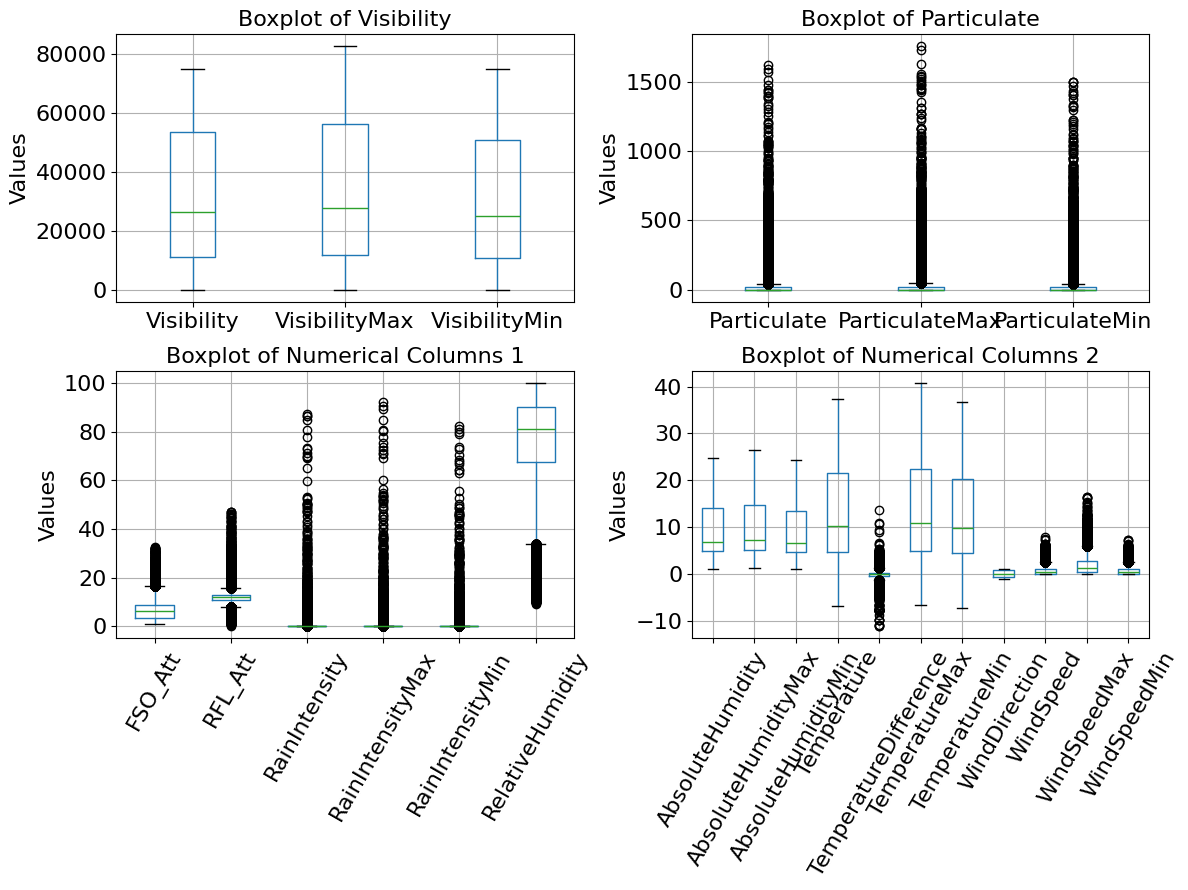

In [10]:
# Exclude specific columns
numerical_data = data.drop(columns=['Visibility', 'VisibilityMax', 'VisibilityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin'])
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
# Plot boxplots
plt.figure(figsize=(12, 9))

# Define height ratios for subplots
height_ratios = [1, 2]

# First subplot: Boxplot of Visibility-related columns
plt.subplot(2, 2, 1)
Visi = data[['Visibility', 'VisibilityMax', 'VisibilityMin']]
Visi.boxplot()
plt.title('Boxplot of Visibility')
#plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)

# Second subplot: Boxplot of Particulate-related columns
plt.subplot(2, 2, 2)
parti = data[['Particulate', 'ParticulateMax', 'ParticulateMin']]
parti.boxplot()
plt.title('Boxplot of Particulate')
#plt.xlabel('Feature',fontsize = 14)
plt.ylabel('Values')
plt.xticks(rotation=0)


# Fourth subplot: Boxplot of remaining numerical columns
plt.subplot(2, 2, 3)
numerical_data[['FSO_Att', 'RFL_Att','RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity']].boxplot()
plt.title('Boxplot of Numerical Columns 1')
#plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=60)

plt.subplot(2, 2, 4)
numerical_data.drop(columns = ['FSO_Att', 'RFL_Att','RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity']).boxplot()
plt.title('Boxplot of Numerical Columns 2')
#plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=60)

plt.tight_layout()  # Automatically adjust subplot layout
plt.show()

# EDA
## Target Variable Analysis

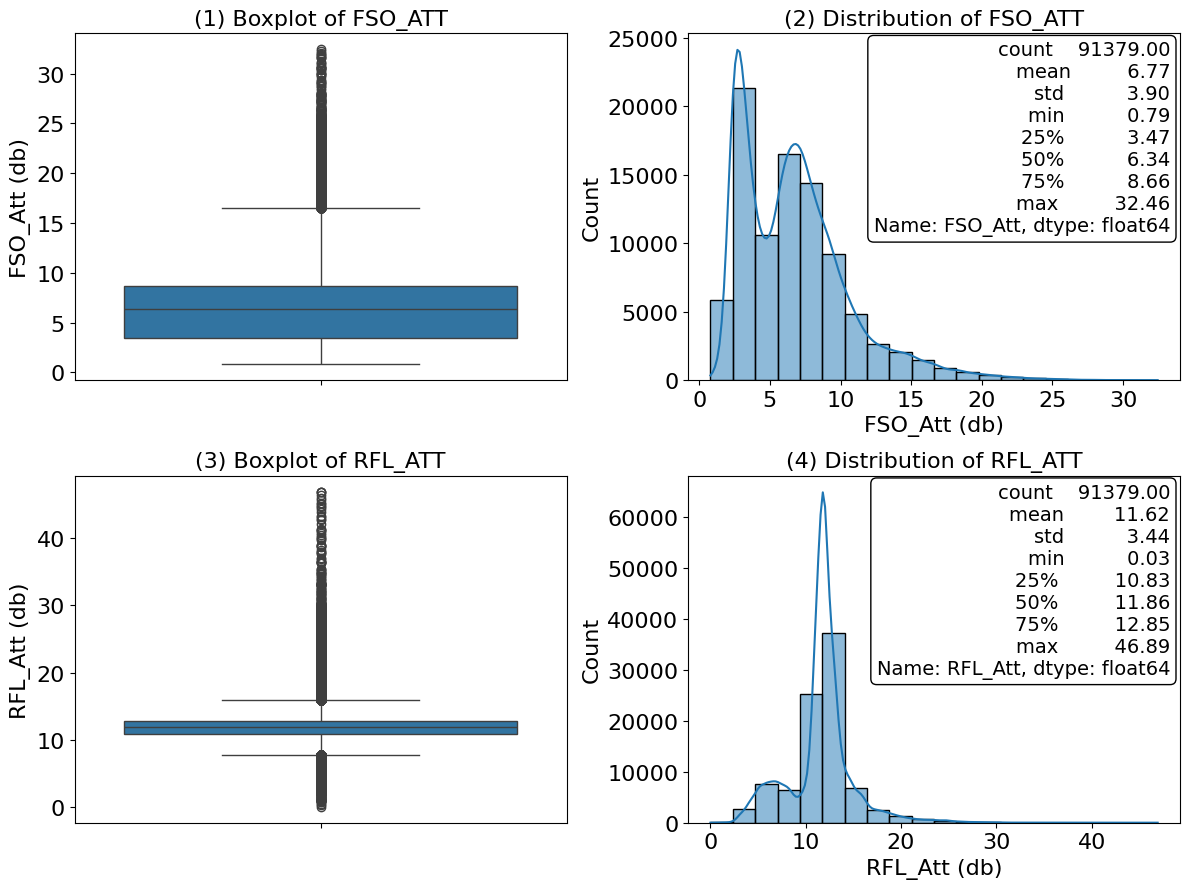

In [12]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
#plt.suptitle("Analysis of Target Variable", fontsize=19)
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)  # 设置刻度字体大小
    ax.title.set_fontsize(16) 
des_fontsize = 14
# Boxplot of FSO_Att
ax1 = sns.boxplot(data=data, y='FSO_Att', whis=1.5, ax=axes[0, 0])
ax1.set_title('(1) Boxplot of FSO_ATT')
ax1.set_ylabel('FSO_Att (db)') 

# Distribution plot of FSO_Att
des = round(data["FSO_Att"].describe(), 2)
ax2 = sns.histplot(data=data, x='FSO_Att', bins=20, kde=True, ax=axes[0, 1])
ax2.text(0.98, 0.98, f'{des}', transform=ax2.transAxes,
         ha='right', va='top', fontsize=des_fontsize,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
ax2.set_title('(2) Distribution of FSO_ATT')
ax2.set_xlabel('FSO_Att (db)') 

# Boxplot of RFL_Att
ax3 = sns.boxplot(data=data, y='RFL_Att', whis=1.5, ax=axes[1, 0])
ax3.set_title('(3) Boxplot of RFL_ATT')
ax3.set_ylabel('RFL_Att (db)') 
# Distribution plot of RFL_Att
des1 = round(data["RFL_Att"].describe(), 2)
ax4 = sns.histplot(data=data, x='RFL_Att', bins=20, kde=True, ax=axes[1, 1])
ax4.text(0.98, 0.98, f'{des1}', transform=ax4.transAxes,
         ha='right', va='top', fontsize=des_fontsize, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
ax4.set_title('(4) Distribution of RFL_ATT')
ax4.set_xlabel('RFL_Att (db)') 

plt.tight_layout()  # Automatically adjust subplot layout
plt.show()



## Feature Exploration

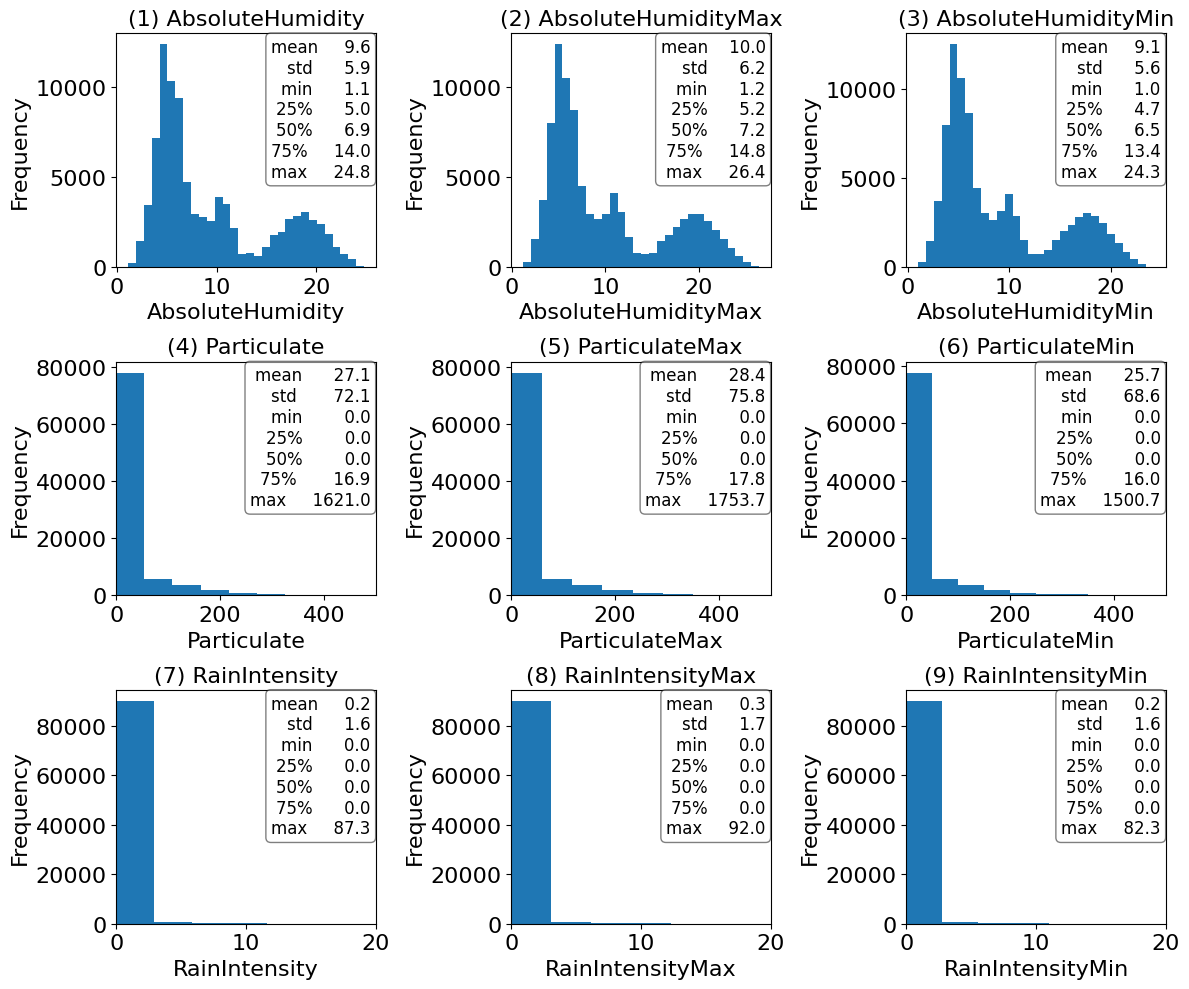

In [21]:
lst_s2 = ["AbsoluteHumidity","AbsoluteHumidityMax","AbsoluteHumidityMin",\
    "Particulate","ParticulateMax","ParticulateMin",\
    "RainIntensity","RainIntensityMax","RainIntensityMin"]
#data_s2 = pd.concat((data.loc[:,lst_s2],data.loc[:,"SalePrice"]),axis=1)
data_s2 = data[lst_s2]
data_s2
title_AbsoluteHumidity ='''AbsoluteHumidity'''
title_AbsoluteHumidityMax ='''AbsoluteHumidityMax'''
title_AbsoluteHumidityMin ='''AbsoluteHumidityMin'''
title_Particulate ='''Particulate'''
title_ParticulateMax='''ParticulateMax'''
title_ParticulateMin ='''ParticulateMin'''
title_RainIntensity ='''RainIntensity'''
title_RainIntensityMax = '''RainIntensityMax'''
title_RainIntensityMin ='''RainIntensityMin'''
title_s2 = ["AbsoluteHumidity","AbsoluteHumidityMax","AbsoluteHumidityMin",\
    "Particulate","ParticulateMax","ParticulateMin",\
    "RainIntensity","RainIntensityMax","RainIntensityMin"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
#Distribution of some numeric/continuous variables.
#fig.suptitle('Histogram_1 of Feature', fontsize=20)

def custom_description(column):
    description = column.describe()
    #description['Value > 0'] = (column > 0).sum()
    description = description.drop('count')
    description = round(description,1)
    return description
# custom_description
# custom_description(des_s2.iloc[:,0])
des_fontsize = 12
for i, column in enumerate(data_s2[lst_s2]):
    
    ax = axes[i // 3, i % 3]  # obtain subplot index

    if ax == axes[1,0] or ax == axes[1,1] or ax == axes[1,2]:
        ax.set_xlim(0,500)
        ax.hist(data_s2[column], bins=30)
    elif ax == axes[2,0] or ax == axes[2,1] or ax == axes[2,2]:
        ax.set_xlim(0,20)
        ax.hist(data_s2[column], bins=30)
    else: 
        ax.hist(data_s2[column], bins=30)  
    ax.set_title(f"({i + 1}) " + lst_s2[i])
    ax.set_xlabel(title_s2[i])
    ax.set_ylabel('Frequency')
    ax.text(0.98, 0.98, f'{custom_description(data_s2.iloc[:,i]).to_string(header=False)}',
        transform=ax.transAxes, ha='right', va='top',fontsize=des_fontsize,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.5))
plt.tight_layout()
plt.show()

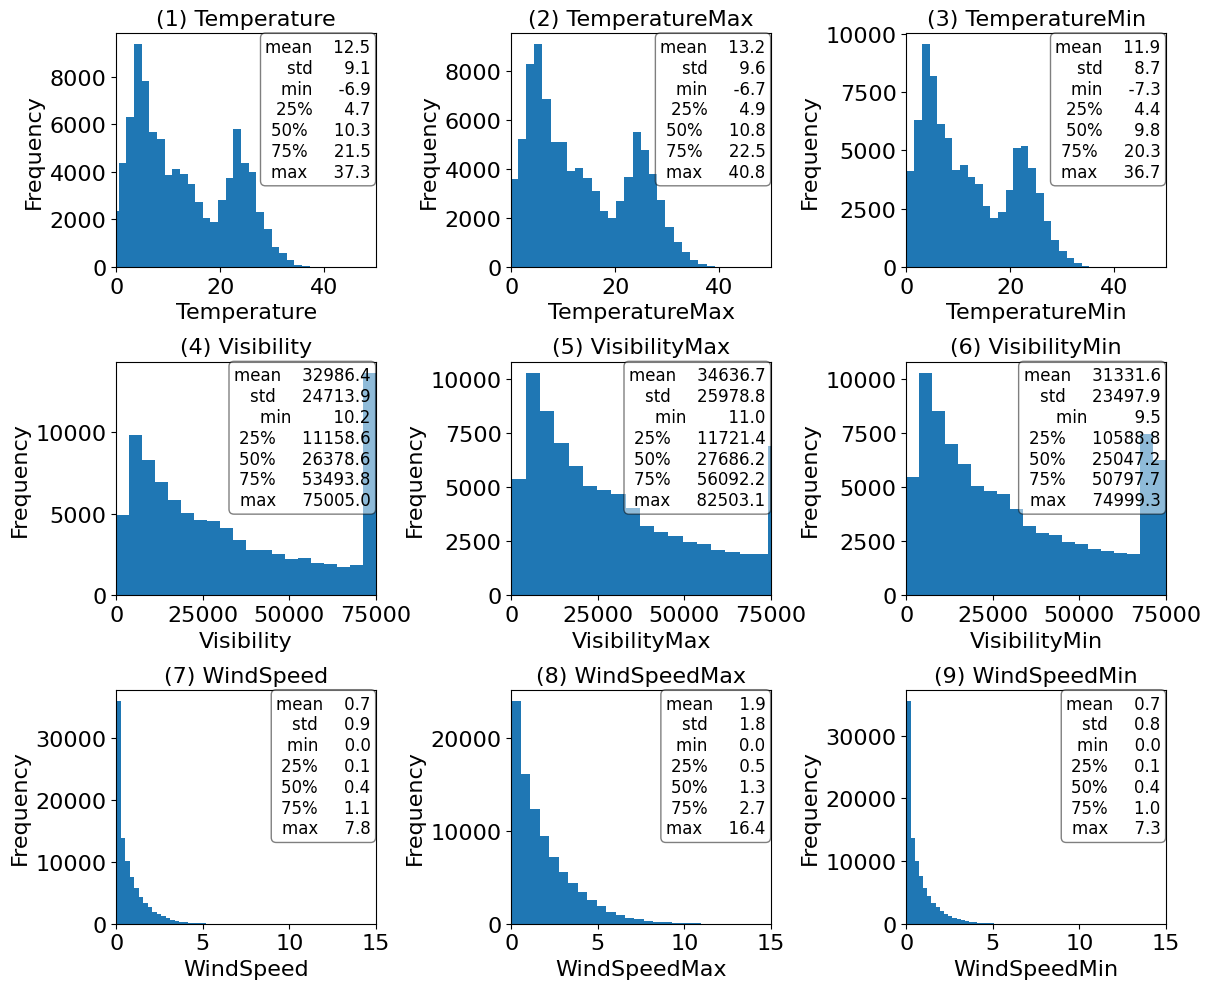

In [32]:
lst_s3 = ["Temperature","TemperatureMax","TemperatureMin",\
    "Visibility","VisibilityMax","VisibilityMin",\
    "WindSpeed","WindSpeedMax","WindSpeedMin"]
#data_s2 = pd.concat((data.loc[:,lst_s2],data.loc[:,"SalePrice"]),axis=1)
data_s3 = data[lst_s3]
data_s3
title_Temperature ='''Temperature'''
title_TemperatureMax ='''TemperatureMax'''
title_TemperatureMin ='''TemperatureMin'''
title_Visibility ='''Visibility'''
title_VisibilityMax='''VisibilityMax'''
title_VisibilityMin ='''VisibilityMin'''
title_WindSpeed ='''WindSpeed'''
title_WindSpeedMax = '''WindSpeedMax'''
title_WindSpeedMin ='''WindSpeedMin'''
title_s3 = ["Temperature","TemperatureMax","TemperatureMin",\
    "Visibility","VisibilityMax","VisibilityMin",\
    "WindSpeed","WindSpeedMax","WindSpeedMin"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
#Distribution of some numeric/continuous variables.
# fig.suptitle('Histogram_2 of Feature', fontsize=20)
des_fontsize = 12
for i, column in enumerate(data_s3[lst_s3]):
    
    ax = axes[i // 3, i % 3]  # obtain subplot index

    if ax == axes[1,0] or ax == axes[1,1] or ax == axes[1,2]:
        ax.set_xlim(0,75000)
        ax.hist(data_s3[column], bins=20)
    elif ax == axes[2,0] or ax == axes[2,1] or ax == axes[2,2]:
        ax.set_xlim(0,15)
        ax.hist(data_s3[column], bins=30)
    else: 
        ax.set_xlim(0,50)
        ax.hist(data_s3[column], bins=30)  
    ax.set_title(f"({i + 1}) " + lst_s3[i])
    ax.set_xlabel(title_s3[i])
    ax.set_ylabel('Frequency')
    ax.text(0.98, 0.98, f'{custom_description(data_s3.iloc[:,i]).to_string(header=False)}',
        transform=ax.transAxes, ha='right', va='top',fontsize=des_fontsize,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.5))

plt.tight_layout()
plt.show()

['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']

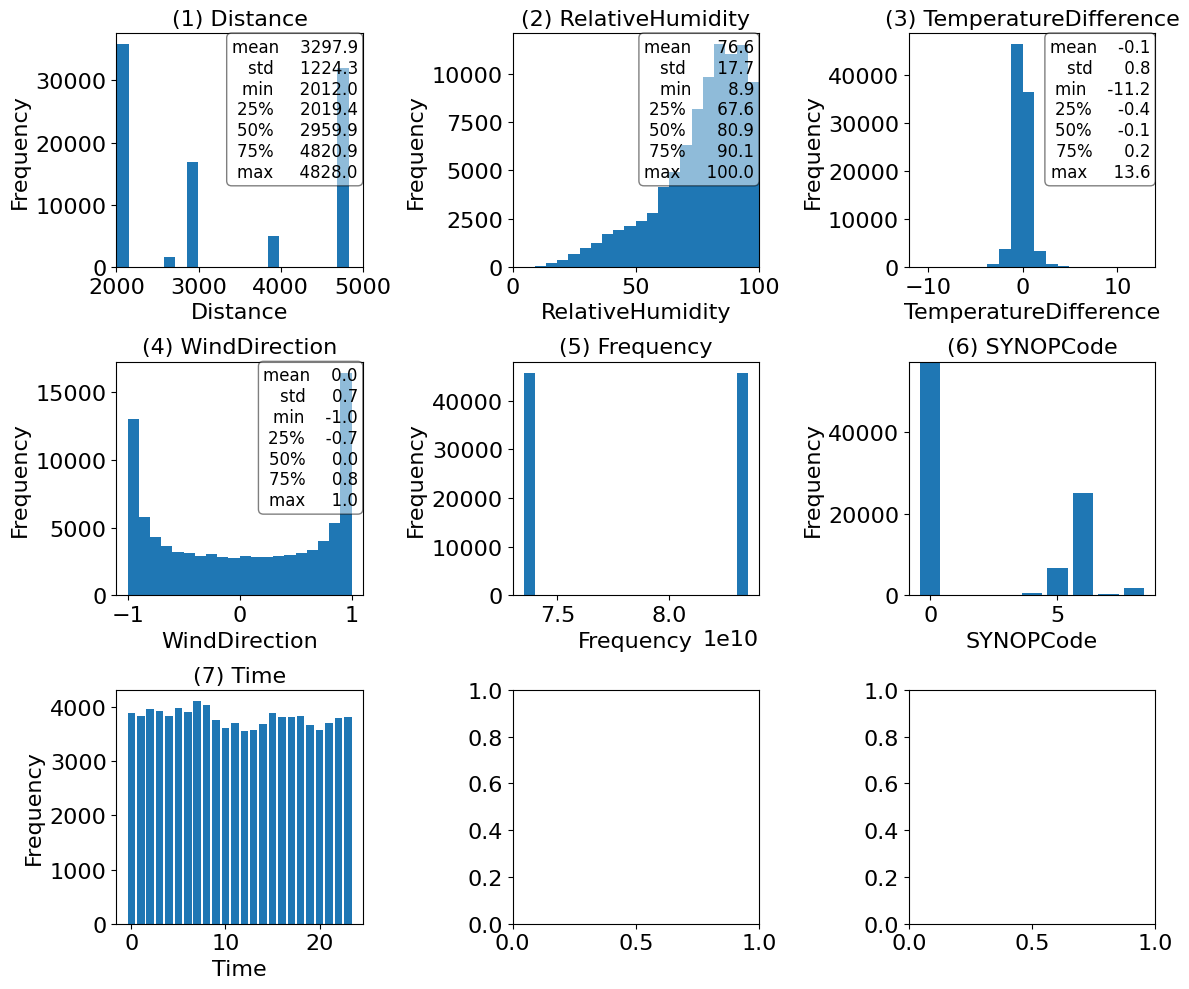

In [24]:
lst_s5 = ["Distance","RelativeHumidity","TemperatureDifference",\
    "WindDirection","Frequency","SYNOPCode",\
    "Time"]
#data_s2 = pd.concat((data.loc[:,lst_s2],data.loc[:,"SalePrice"]),axis=1)
data_s5 = data[lst_s5]

title_Distance ='''Distance'''
title_RelativeHumidity ='''RelativeHumidity'''
title_TemperatureDifference ='''TemperatureDifference'''
title_WindDirection ='''WindDirection'''
title_Frequency='''Frequency'''
title_SYNOPCode ='''SYNOPCode'''
title_Time ='''Time'''

title_s5 = ["Distance","RelativeHumidity","TemperatureDifference",\
    "WindDirection","Frequency","SYNOPCode",\
    "Time"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
#Distribution of some numeric/continuous variables.
#fig.suptitle('Histogram_3 of Feature', fontsize=20)
des_fontsize = 12

for i, column in enumerate(data_s5[lst_s5]):
    
    ax = axes[i // 3, i % 3]  # obtain subplot index
    if ax == axes[0,0] or ax == axes[0,1] or ax == axes[0,2] or ax == axes[1,0]or ax == axes[1,1]:
       
        if ax == axes[0,0]:
            ax.set_xlim(2000,5000)
            ax.hist(data_s5[column], bins=20)
        elif  ax == axes[0,1]:
            ax.set_xlim(0,100)
            ax.hist(data_s5[column], bins=20)
        elif  ax == axes[0,2]:
            ax.set_xlim(-12,14)
            ax.hist(data_s5[column], bins=20)
        else: 
            ax.hist(data_s5[column], bins=20)  
        ax.set_title(f"({i + 1}) " + lst_s5[i])
        ax.set_xlabel(title_s5[i])
        ax.set_ylabel('Frequency')
        if data_s5[column].dtype != object:
            ax.text(0.98, 0.98, f'{custom_description(data_s5.iloc[:,i]).to_string(header=False)}',
                transform=ax.transAxes, ha='right', va='top',fontsize=des_fontsize,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.5))
    else:
        ax.bar(data_s5[column].value_counts().index, data_s5[column].value_counts())
        ax.set_title(f"({i + 1}) " + lst_s5[i])
        ax.set_xlabel(title_s5[i])
        ax.set_ylabel('Frequency')
        ax.set_ylim(0,max(data_s5[column].value_counts())+200)

plt.tight_layout()
plt.show()

TypeError: 'Legend' object is not callable

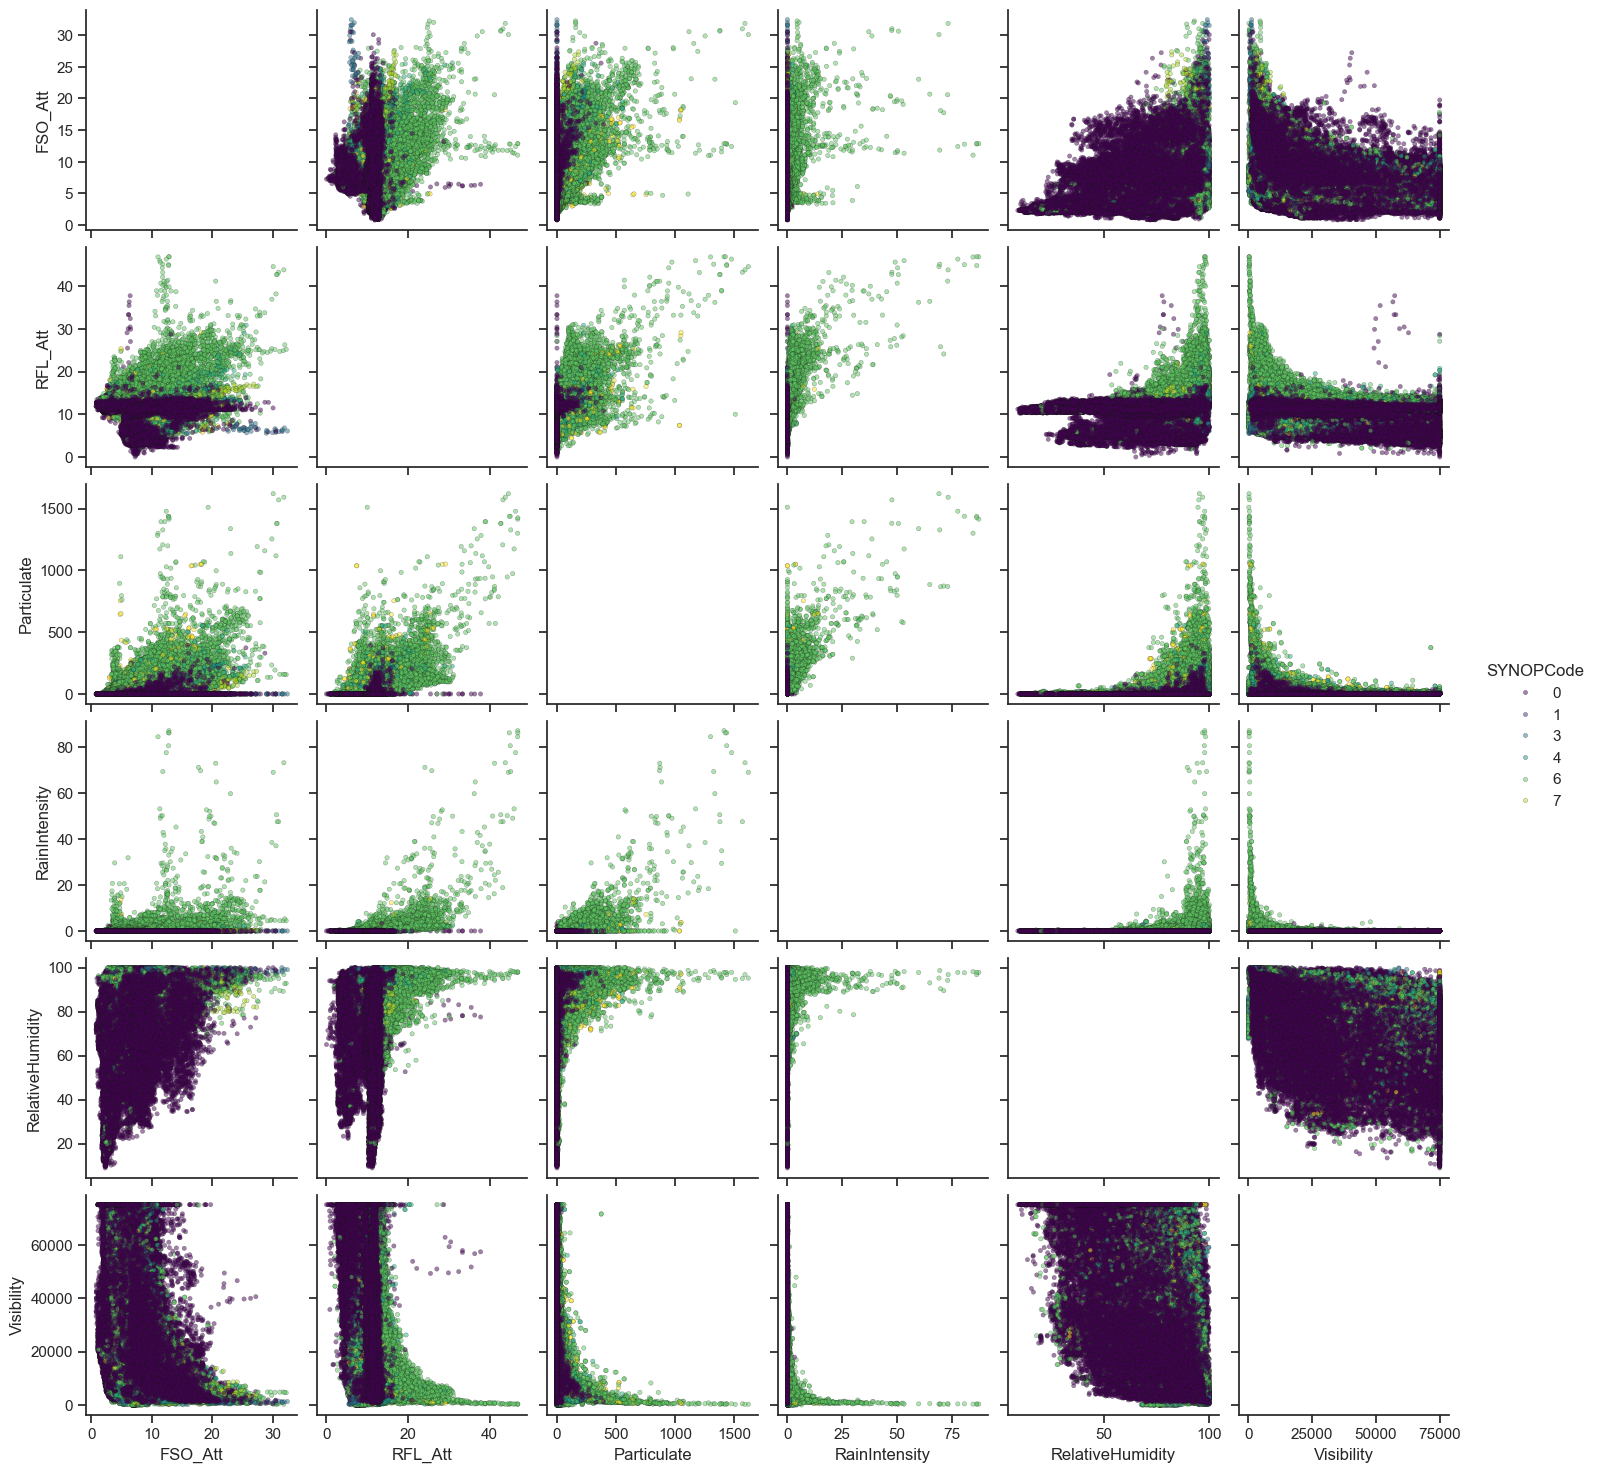

In [46]:
columns = ['FSO_Att','RFL_Att','Particulate',\
      'RainIntensity', 'RelativeHumidity',\
        'Visibility',"SYNOPCode"]

# Create a DataFrame with the selected columns
df = data[columns]
sns.set(style="ticks")
g = sns.pairplot(df, hue='SYNOPCode', diag_kind='scatter', \
                 palette='viridis', \
                plot_kws={'alpha': 0.5, 's': 10, 'edgecolor': 'k'}, \
                                  diag_kws={'alpha': 0.5})


# 设置图例的标题和字体大小
g.legend(fontsize=20)

# 显示图形
plt.show()


C:\Users\nining\AppData\Local\Temp\ipykernel_15116\1593116475.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
C:\Users\nining\AppData\Local\Temp\ipykernel_15116\1593116475.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=60)


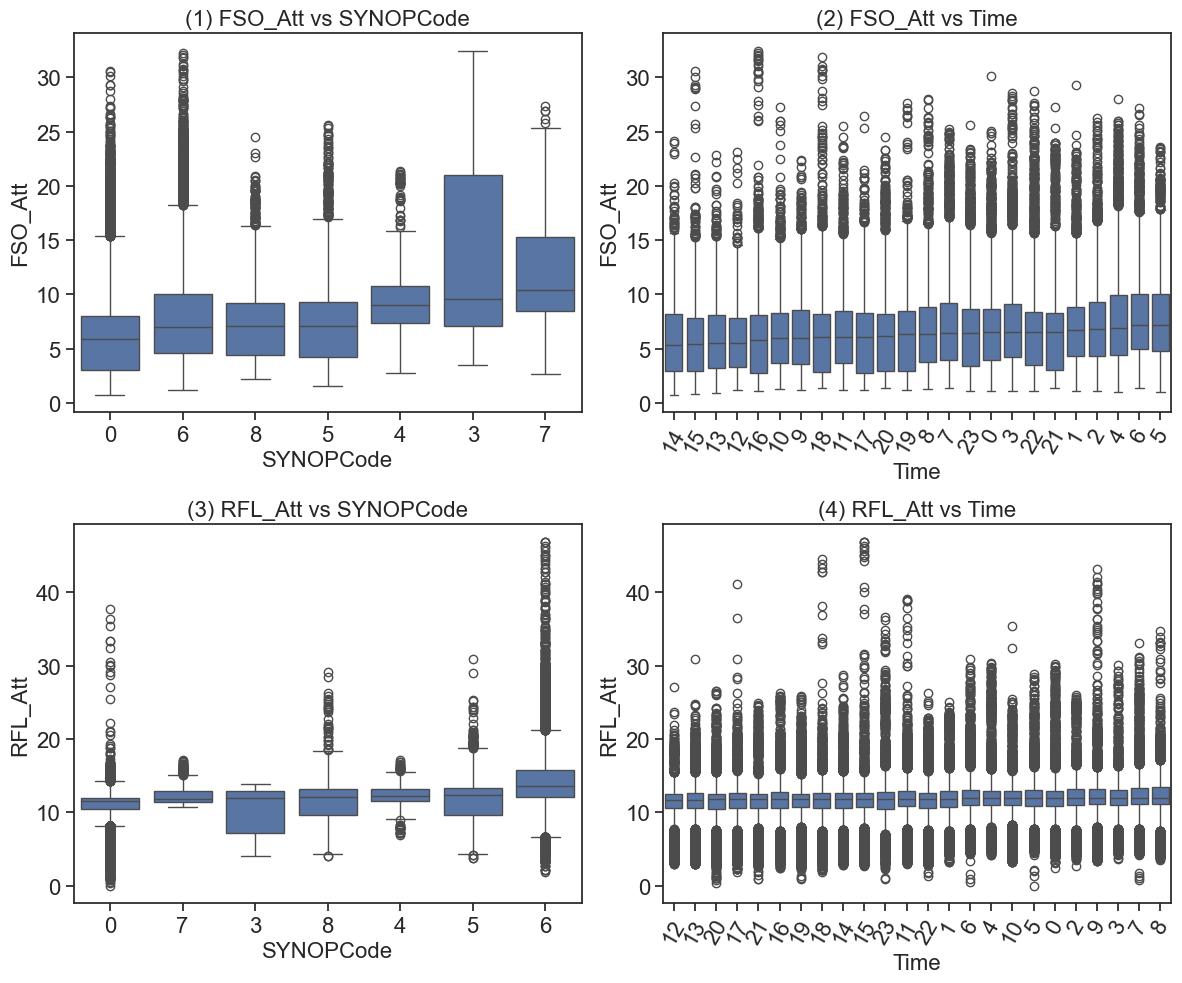

In [43]:

# Calculate median for each category
median_FSO_Att_by_SYNOPCode = data.groupby('SYNOPCode')['FSO_Att'].median().sort_values()
median_FSO_Att_by_Time = data.groupby('Time')['FSO_Att'].median().sort_values()
median_RFL_Att_by_SYNOPCode = data.groupby('SYNOPCode')['RFL_Att'].median().sort_values()
median_RFL_Att_by_Time = data.groupby('Time')['RFL_Att'].median().sort_values()

# Reorder the categories based on median
ordered_SYNOPCode_FSO = median_FSO_Att_by_SYNOPCode.index
ordered_Time_FSO = median_FSO_Att_by_Time.index
ordered_SYNOPCode_RFL = median_RFL_Att_by_SYNOPCode.index
ordered_Time_RFL = median_RFL_Att_by_Time.index
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
#fig.suptitle('Boxplot of Attenuation vs categorical variables', fontsize=20)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
ax1 = axes[0, 0]  
sns.boxplot(data=data, x='SYNOPCode', y='FSO_Att', order=ordered_SYNOPCode_FSO, ax=ax1)
ax1.set_title("(1) FSO_Att vs SYNOPCode")
ax1.set_ylabel('FSO_Att')

ax2 = axes[0, 1]  
sns.boxplot(data=data, x='Time', y='FSO_Att', order=ordered_Time_FSO, ax=ax2)
ax2.set_title("(2) FSO_Att vs Time")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60) 
ax2.set_ylabel('FSO_Att')

ax3 = axes[1, 0]  
sns.boxplot(data=data, x='SYNOPCode', y='RFL_Att', order=ordered_SYNOPCode_RFL, ax=ax3)
ax3.set_title("(3) RFL_Att vs SYNOPCode")
ax3.set_ylabel('RFL_Att')

ax4 = axes[1, 1]  
sns.boxplot(data=data, x='Time', y='RFL_Att', order=ordered_Time_RFL, ax=ax4)
ax4.set_title("(4) RFL_Att vs Time")
ax4.set_ylabel('RFL_Att')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=60) 
plt.tight_layout()
plt.show()

## Corelation

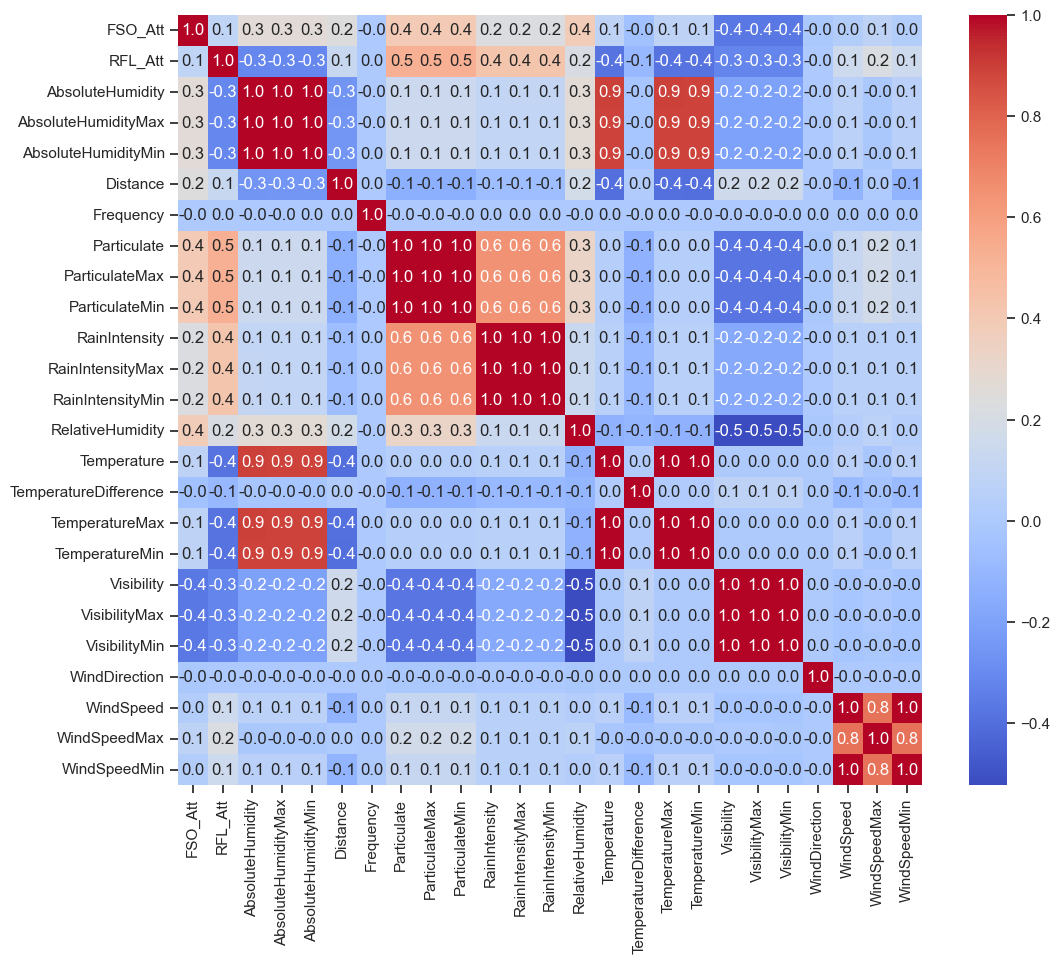

In [45]:
lst_geo = ['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']

data_geo = data[lst_geo]



correlation_matrix = data_geo.corr()

# 绘制热图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
#plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

C:\Users\nining\AppData\Local\Temp\ipykernel_10980\1586140778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_geo["AbsoluteHumidityRange"] = data_geo["AbsoluteHumidityMax"] - data_geo["AbsoluteHumidityMin"]


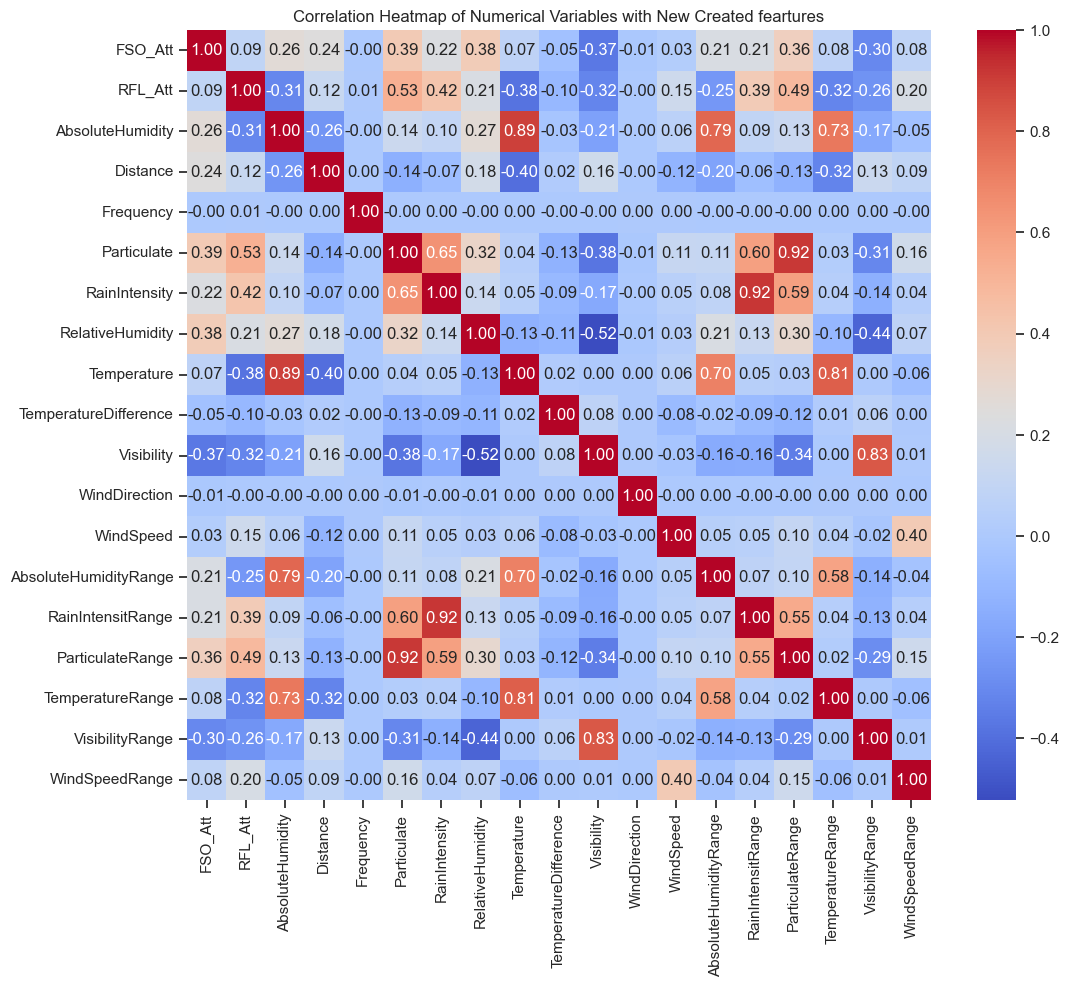

In [42]:
data_geo["AbsoluteHumidityRange"] = data_geo["AbsoluteHumidityMax"] - data_geo["AbsoluteHumidityMin"]
data_geo["RainIntensitRange"] = data_geo["RainIntensityMax"] - data_geo["RainIntensityMin"]
data_geo["ParticulateRange"] = data_geo["ParticulateMax"] - data_geo["ParticulateMin"]
data_geo["TemperatureRange"] = data_geo["TemperatureMax"] - data_geo["TemperatureMin"]
data_geo["VisibilityRange"] = data_geo["VisibilityMax"] - data_geo["VisibilityMin"]
data_geo["WindSpeedRange"] = data_geo["WindSpeedMax"] - data_geo["WindSpeedMin"]

columns_to_remove = ["AbsoluteHumidityMax", "AbsoluteHumidityMin", "RainIntensityMax", "RainIntensityMin", "ParticulateMax", "ParticulateMin", "TemperatureMax", "TemperatureMin", "VisibilityMax", "VisibilityMin", "WindSpeedMax", "WindSpeedMin"]

data_geo = data_geo.drop(columns=columns_to_remove)

correlation_matrix = data_geo.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables with New Created feartures')
plt.show()

C:\Users\nining\AppData\Local\Temp\ipykernel_15116\3917591003.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(s.index, rotation=60)
C:\Users\nining\AppData\Local\Temp\ipykernel_15116\3917591003.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(s1.index, rotation=60)


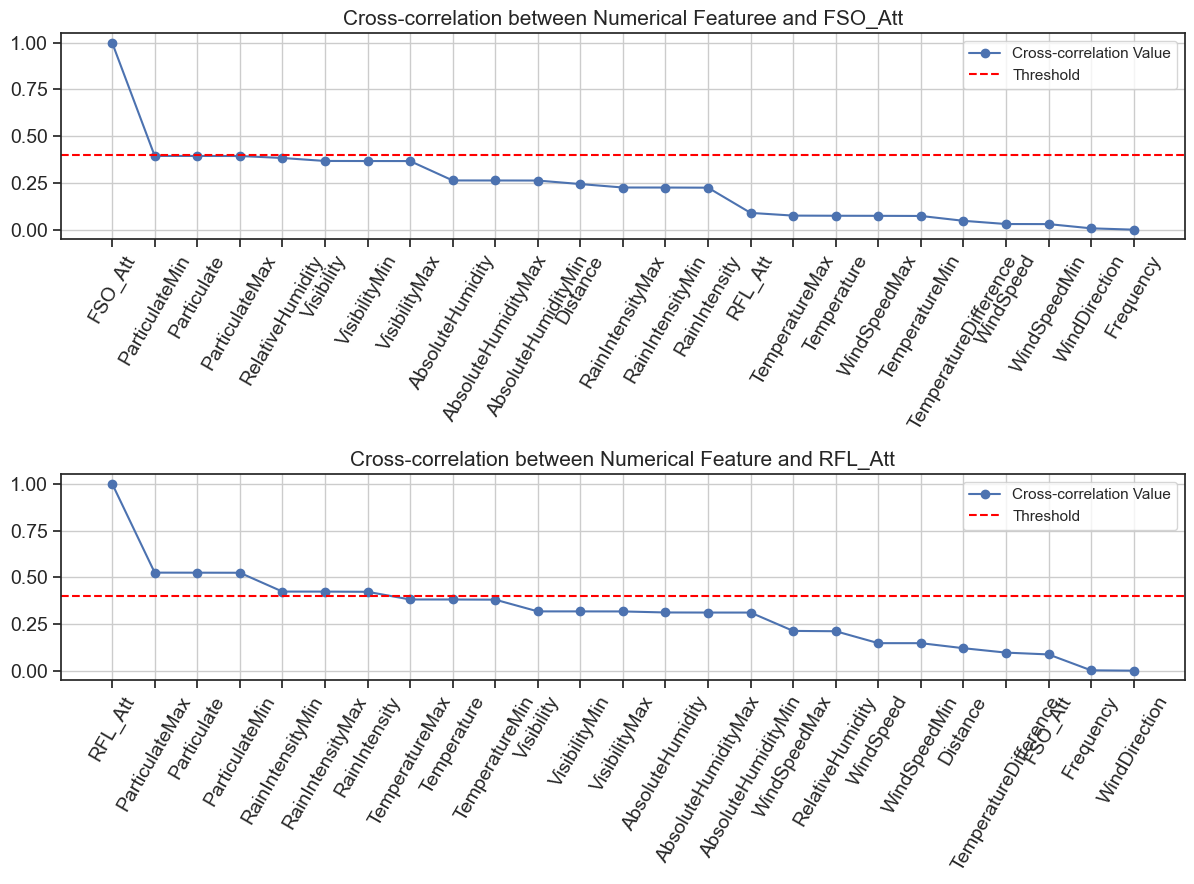

In [48]:
s = abs(correlation_matrix['FSO_Att']).sort_values(ascending= False)
s1 = abs(correlation_matrix['RFL_Att']).sort_values(ascending= False)
cross_thresholds = 0.4

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))

# 绘制第一个图
ax1.plot(s.index, s.values, marker='o', label='Cross-correlation Value')
ax1.set_title('Cross-correlation between Numerical Featuree and FSO_Att', fontdict={'fontsize': 15})
ax1.set_xticklabels(s.index, rotation=60)
#ax1.set_xlabel("Variables")
#ax1.set_ylabel('Cross-correlation Value')
ax1.axhline(y=cross_thresholds, color='red', linestyle='--', label='Threshold')
ax1.legend()
ax1.grid(True)

# 绘制第二个图
ax2.plot(s1.index, s1.values, marker='o', label='Cross-correlation Value')
ax2.set_title('Cross-correlation between Numerical Feature and RFL_Att', fontdict={'fontsize': 15})
ax2.set_xticklabels(s1.index, rotation=60)
#ax2.set_xlabel("Variables")
#ax2.set_ylabel('Cross-correlation Value')
ax2.axhline(y=cross_thresholds, color='red', linestyle='--', label='Threshold')
ax2.legend()
ax2.grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [44]:
from itertools import combinations

categorical_cols= ['Time', 'SYNOPCode','Frequency']
    
data_cat = data[categorical_cols]
cat_pairs = combinations(data_cat, 2) #tuples with pairs of features.
chisq_df_rows = []  #Prepare to create a dataframe.
# for c in cat_pairs:
#     print(c)
N = data_cat.shape[0]  #number of observations or rows.
for cat1, cat2 in cat_pairs:
    cat_crosstab = pd.crosstab(data_cat[cat1], data_cat[cat2], normalize=False)
    chisq,p,dof,_ = chi2_contingency(cat_crosstab) #_ is 'expected' crosstab table
    #for Cramer's V
    k = min(len(data_cat[cat1].unique()), len(data_cat[cat2].unique()))
    cramersV = math.sqrt(chisq/(N*(k-1)))
    chisq_df_rows.append((cat1, cat2, chisq, p, cramersV, k))
    
chisq_df = pd.DataFrame(chisq_df_rows, columns = ['Cat1','Cat2','chisq','p','Cramers V','dof'])    
cat_pairs = combinations(data_cat, 2) #tuples with pairs of features.
chisq_df_rows = []  #Prepare to create a dataframe.
# for c in cat_pairs:
#     print(c)
N = data_cat.shape[0]  #number of observations or rows.
for cat1, cat2 in cat_pairs:
    cat_crosstab = pd.crosstab(data_cat[cat1], data_cat[cat2], normalize=False)
    chisq,p,dof,_ = chi2_contingency(cat_crosstab) #_ is 'expected' crosstab table
    #for Cramer's V
    k = min(len(data_cat[cat1].unique()), len(data_cat[cat2].unique()))
    cramersV = math.sqrt(chisq/(N*(k-1)))
    chisq_df_rows.append((cat1, cat2, chisq, p, cramersV, k))
    
chisq_df = pd.DataFrame(chisq_df_rows, columns = ['cat1','cat2','chisq','p','Cramers V','dof'])
#create dataframe with the data.
chisq_df

,cat1,cat2,chisq,p,Cramers V,dof
0,Time,SYNOPCode,2470.848797,0.000000,0.067131,7
1,Time,Frequency,3.125616,1.000000,0.005849,2
2,SYNOPCode,Frequency,0.833377,0.991149,0.003020,2


# DT Model Establishment

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score, KFold,validation_curve,GridSearchCV

Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
    ModelFunctions.split_data(data, "FSO_Att",drop_column = ["Frequency",'RFL_Att']) # Frequency doesn't relate to FSO_Att

Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
    ModelFunctions.split_data(data, "RFL_Att",drop_column = ['FSO_Att'])


#######  FSO_Att Data Set  ######
FSO_Att Training set feature count: (63965, 24)
FSO_Att Validation set feature count: (13707, 24)
FSO_Att Training set label count: (63965,)
FSO_Att Validation set label count: (13707,)
#######  RFL_Att Data Set  ######
RFL_Att Training set feature count: (63965, 25)
RFL_Att Validation set feature count: (13707, 25)
RFL_Att Training set label count: (63965,)
RFL_Att Validation set label count: (13707,)


## DesicionTree Model

In [53]:
parameters = {#'splitter':('best','random')
              #,'criterion':("gini","entropy")，
              "max_depth":[*range(10,41,2)]
              ,'min_samples_leaf':[1,10,50,100]
              #,'min_impurity_decrease':[*np.linspace(0,0.5,20)
              ,'min_samples_split':[2,11,51,101]

             }

rfr = DecisionTreeRegressor(random_state=25)
kf = KFold(n_splits=4, shuffle=True, random_state=0)

GS_mse_fso = GridSearchCV(rfr, parameters, cv=kf, scoring="neg_mean_squared_error",n_jobs=4)
GS_mse_fso.fit(Xtrain_fso, Ytrain_fso)
GS_r2_fso = GridSearchCV(rfr, parameters, cv=kf, scoring="r2",n_jobs=4)
GS_r2_fso.fit(Xtrain_fso, Ytrain_fso)

print(GS_mse_fso.best_params_)
print(GS_mse_fso.best_score_)

print(GS_r2_fso.best_params_)
print(GS_r2_fso.best_score_)


{'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2}
-1.5412145706484497
{'max_depth': 24, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8996299592471423


In [54]:


GS_mse_rfl = GridSearchCV(rfr, parameters, cv=kf, scoring="neg_mean_squared_error",n_jobs=4)
GS_mse_rfl.fit(Xtrain_rfl, Ytrain_rfl)
GS_r2_rfl = GridSearchCV(rfr, parameters, cv=kf, scoring="r2",n_jobs=4)
GS_r2_rfl.fit(Xtrain_rfl, Ytrain_rfl)

print(GS_mse_rfl.best_params_)
print(GS_mse_rfl.best_score_)

print(GS_r2_rfl.best_params_)
print(GS_r2_rfl.best_score_)

{'max_depth': 22, 'min_samples_leaf': 10, 'min_samples_split': 2}
-0.5874094537240808
{'max_depth': 22, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.9504637011470064


In [55]:
import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M")
file_extent = "_DT"

############################################################################
file_name_fso_mse = f'fso_gscv_mse_{timestamp}'
for param, values in parameters.items():
    file_name_fso_mse += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
file_name_fso_mse += file_extent
file_name_fso_mse += '.pkl'  
print(file_name_fso_mse)
############################################################################
file_name_fso_r2 = f'fso_gscv_r2_{timestamp}'
for param, values in parameters.items():
    file_name_fso_r2 += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
file_name_fso_r2 += file_extent
file_name_fso_r2 += '.pkl'  
print(file_name_fso_r2)
#############################################################################
file_name_rfl_mse = f'rfl_gscv_mse_{timestamp}'
for param, values in parameters.items():
    file_name_rfl_mse += f'_{param}-{min(values)}-{max(values)}-{len(values)}'
file_name_rfl_mse += file_extent
file_name_rfl_mse += '.pkl'  
print(file_name_rfl_mse)
############################################################################
file_name_rfl_r2 = f'rfl_gscv_r2_{timestamp}'
for param, values in parameters.items():
    file_name_rfl_r2 += f'_{param}-{min(values)}-{max(values)}-{len(values)}'

file_name_rfl_r2 += file_extent
file_name_rfl_r2 += '.pkl' 
print(file_name_rfl_r2)
#############################################################################
joblib.dump(GS_mse_fso, file_name_fso_mse)
joblib.dump(GS_r2_fso, file_name_fso_r2)
# loaded_GS_mse = joblib.load(file_name_fso_mse)
# loaded_GS_r2 = joblib.load(file_name_fso_r2)

joblib.dump(GS_mse_rfl, file_name_rfl_mse)
joblib.dump(GS_r2_rfl, file_name_rfl_r2)
# loaded_GS_mse = joblib.load(file_name_rfl_mse)
# loaded_GS_r2 = joblib.load(file_name_rfl_r2)

fso_gscv_mse_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl
fso_gscv_r2_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl
rfl_gscv_mse_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl
rfl_gscv_r2_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl


['rfl_gscv_r2_202403010017_max_depth-10-40-16_min_samples_leaf-1-100-4_min_samples_split-2-101-4_DT.pkl']